In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re

In [3]:
os.getcwd()

'/Users/michalmacbookpro/Desktop/Python/SKlearn_Pytorch'

In [4]:
path = "/Users/michalmacbookpro/Downloads/titanic"


In [5]:
df = pd.read_csv(path + "/train.csv")
df2 = np.array(df)
df2[0]

array([1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0,
       'A/5 21171', 7.25, nan, 'S'], dtype=object)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

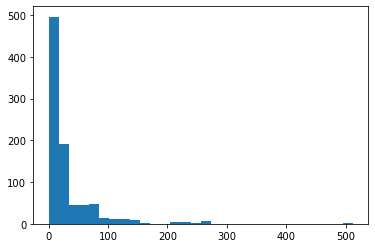

In [8]:
plt.hist(df["Fare"],bins=30)

In [9]:
df.groupby(["Sex"])["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [10]:
df[["C","Q","S"]] = pd.get_dummies(df["Embarked"])

In [11]:
df[["man","woman"]] = pd.get_dummies(df["Sex"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,man,woman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


In [12]:
df[["Pclass_1","Pclass_2","Pclass_3"]] = pd.get_dummies(df["Pclass"])

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,man,woman,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,1


In [14]:
to_drop=["Sex","Embarked", "Pclass"]

In [15]:
##Married ?

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
C                0
Q                0
S                0
man              0
woman            0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

In [17]:
for i in df["Name"].iloc[1].split():
    if "Mrs" in i:
        print(i)

Mrs.


In [18]:
dff = df.iloc[:5].copy()

In [19]:
def get_title(item):
    return item.str.extract(r'([A-Za-z]+\.)')

In [20]:
df["title"] = get_title(df["Name"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,man,woman,Pclass_1,Pclass_2,Pclass_3,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,0,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,1,0,0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,0,0,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,1,0,0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,0,1,Mr.


In [21]:
np.unique(df["title"])

array(['Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.',
       'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.',
       'Ms.', 'Rev.', 'Sir.'], dtype=object)

In [22]:
df.groupby("title")["Survived"].sum()

title
Capt.          0
Col.           1
Countess.      1
Don.           0
Dr.            3
Jonkheer.      0
Lady.          1
Major.         1
Master.       23
Miss.        127
Mlle.          2
Mme.           1
Mr.           81
Mrs.          99
Ms.            1
Rev.           0
Sir.           1
Name: Survived, dtype: int64

In [23]:
(df.groupby("title")["Survived"].sum()/df.title.value_counts())*100

Capt.          0.000000
Col.          50.000000
Countess.    100.000000
Don.           0.000000
Dr.           42.857143
Jonkheer.      0.000000
Lady.        100.000000
Major.        50.000000
Master.       57.500000
Miss.         69.780220
Mlle.        100.000000
Mme.         100.000000
Mr.           15.667311
Mrs.          79.200000
Ms.          100.000000
Rev.           0.000000
Sir.         100.000000
dtype: float64

In [24]:
df.title.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: title, dtype: int64

In [25]:
crew = ["Col.","Capt.","Rev."]
mr = ["Mr.", "Master.", "Jonkheer.", "Dr.","."]
mrs = ["Miss"]

In [26]:
df.drop(to_drop,axis=1,inplace=True)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,man,woman,Pclass_1,Pclass_2,Pclass_3,title
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1,Mr.
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0,Mrs.
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1,Miss.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0,1,0,0,Mrs.
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1,Mr.


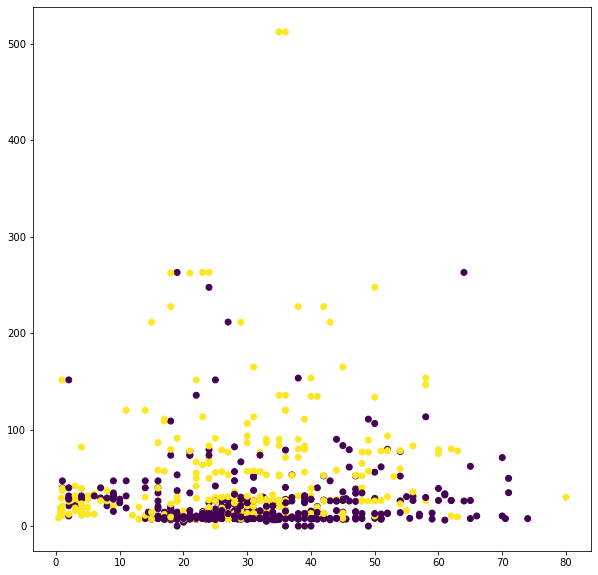

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(df["Age"],df["Fare"],c=df["Survived"])

In [28]:
np.unique(df["SibSp"])

array([0, 1, 2, 3, 4, 5, 8])

In [29]:
df.drop(["Name"],inplace=True,axis=1)

In [30]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,man,woman,Pclass_1,Pclass_2,Pclass_3,title
0,1,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1,Mr.
1,2,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0,Mrs.
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1,Miss.
3,4,1,35.0,1,0,113803,53.1000,C123,0,0,1,1,0,1,0,0,Mrs.
4,5,0,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1,Mr.


In [40]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
df["Age"].fillna(np.mean(df["Age"]),inplace=True)

In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
C                0
Q                0
S                0
man              0
woman            0
Pclass_1         0
Pclass_2         0
Pclass_3         0
title            0
dtype: int64

In [46]:
df.drop(["Ticket", "Cabin"],inplace=True,axis=1)

In [47]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,C,Q,S,man,woman,Pclass_1,Pclass_2,Pclass_3,title
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,Mr.
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,Mrs.
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,Miss.
3,4,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0,Mrs.
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,Mr.


In [51]:
dff = pd.get_dummies(df["title"])

In [52]:
dff

,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
887,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
df = pd.concat([df,dff],axis=1)

In [60]:
df.drop("title",inplace=True,axis=1)

In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S', 'man', 'woman', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Capt.',
       'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.',
       'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.',
       'Sir.'],
      dtype='object')

In [62]:
y = df["Survived"]

In [70]:
X = df[['Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q','S', 'man', 'woman', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Capt.','Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.','Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.','Sir.']]

In [71]:
X

,Age,SibSp,Parch,Fare,C,Q,S,man,woman,Pclass_1,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,22.000000,1,0,7.2500,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,38.000000,1,0,71.2833,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,35.000000,1,0,53.1000,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,35.000000,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
887,19.000000,0,0,30.0000,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
888,29.699118,1,2,23.4500,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
889,26.000000,0,0,30.0000,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc = StandardScaler()

In [138]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [139]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [86]:
rfc = RandomForestClassifier(max_depth=4,n_estimators=30)

In [146]:
rfc.fit(X_train_sc,y_train)
y_pred = rfc.predict(X_test_sc)
print(f1_score(y_pred,y_test))

0.7692307692307692


In [106]:
from sklearn.svm import SVC

svc = SVC(C=5.0,kernel="rbf")

In [147]:
svc.fit(X_train_sc,y_train)
y_pred_2 = svc.predict(X_test_sc)
print(f1_score(y_pred_2,y_test))

0.7558139534883722


In [108]:
X2 = df[['Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q','S', 'man', 'woman', 'Pclass_1', 'Pclass_2', 'Pclass_3']]

In [110]:
X_train_2, X_test_2 ,y_train_2, y_test_2 = train_test_split(X2,y,test_size=0.3)

In [114]:
rfc2 = RandomForestClassifier(max_depth=4)

In [115]:
rfc2.fit(X_train_2,y_train_2)
y_pred_2_1 = rfc2.predict(X_test_2)
print(f1_score(y_pred_2_1,y_test_2))

0.73224043715847


In [130]:
imp = rfc.feature_importances_
ind = np.argsort(imp)[::-1]
col = X_train.columns
for i in range(len(imp)):
    print(f"{col[ind[i]]}   {imp[ind[i]]}")

man   0.25791967095961776
Mr.   0.16823487684409283
woman   0.13555097882834755
Fare   0.12141247336681914
Pclass_3   0.05750082392214015
Pclass_1   0.04938185548237473
Age   0.048540593400684756
Miss.   0.0456233357313103
Mrs.   0.03262145101869086
SibSp   0.015465225542858209
Pclass_2   0.014837113011062577
C   0.014766155446185198
Parch   0.012043561649608452
Master.   0.008816251174499797
S   0.0074944402707175384
Q   0.003403584239197355
Dr.   0.0026735442718025695
Ms.   0.0022792914393410246
Don.   0.0007948926719312583
Rev.   0.0004018192522387933
Col.   0.00016652248034428196
Major.   6.342943091912069e-05
Mlle.   7.688664354455043e-06
Countess.   4.209008612275618e-07
Capt.   0.0
Jonkheer.   0.0
Lady.   0.0
Mme.   0.0
Sir.   0.0


In [131]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [143]:
pca = PCA(n_components=2)
lr = LogisticRegression()

In [144]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [145]:
lr.fit(X_train_pca,y_train)
y_pred_pca = lr.predict(X_test_pca)
print(f1_score(y_test,y_pred_pca))

0.36879432624113473
